In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Saving chip_data.zip to chip_data (1).zip
replace data/dataset/test/defect/D2_C97.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Name: SURYA P
Register Number: 212224230280

Total Training Samples: 172
Total Testing Samples: 121
Shape of First Image: torch.Size([3, 224, 224])


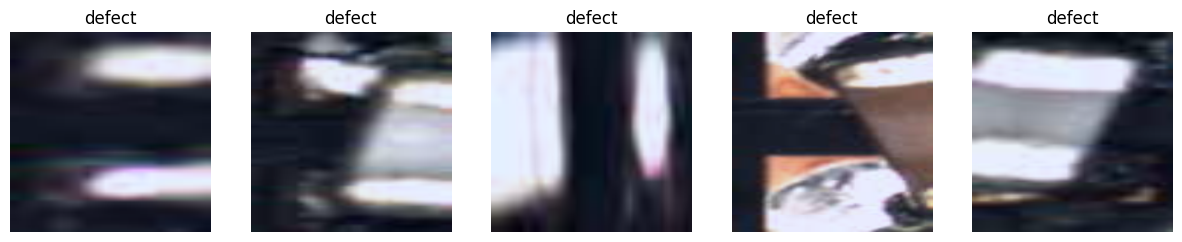

In [6]:
from google.colab import files
uploaded = files.upload()
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

!unzip -qq ./chip_data.zip -d data

dataset_path ="./data/dataset"

train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)
print("\nName: SURYA P")
print("Register Number: 212224230280")
print(f"\nTotal Training Samples: {len(train_dataset)}")
print(f"Total Testing Samples: {len(test_dataset)}")

first_image, label = train_dataset[0]
print(f"Shape of First Image: {first_image.shape}")

def show_sample_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15,5))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        image = image.numpy()
        image = (image - image.min()) / (image.max() - image.min())
        axes[i].imshow(image)
        axes[i].set_title(dataset.classes[label])
        axes[i].axis("off")
    plt.show()

show_sample_images(train_dataset)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
model = models.vgg19(pretrained=True)
num_classes = len(train_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

for param in model.features.parameters():
    param.requires_grad = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.0001)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Name: SURYA P
Register Number: 212224230280

Epoch [1/10] Train Loss: 0.6603 Validation Loss: 0.5526
Epoch [2/10] Train Loss: 0.5940 Validation Loss: 0.4945
Epoch [3/10] Train Loss: 0.5233 Validation Loss: 0.4577
Epoch [4/10] Train Loss: 0.5091 Validation Loss: 0.4279
Epoch [5/10] Train Loss: 0.4671 Validation Loss: 0.4013
Epoch [6/10] Train Loss: 0.4297 Validation Loss: 0.3786
Epoch [7/10] Train Loss: 0.4059 Validation Loss: 0.3597
Epoch [8/10] Train Loss: 0.3528 Validation Loss: 0.3434
Epoch [9/10] Train Loss: 0.3378 Validation Loss: 0.3293
Epoch [10/10] Train Loss: 0.3245 Validation Loss: 0.3169

Name: SURYA P
Register Number: 212224230280



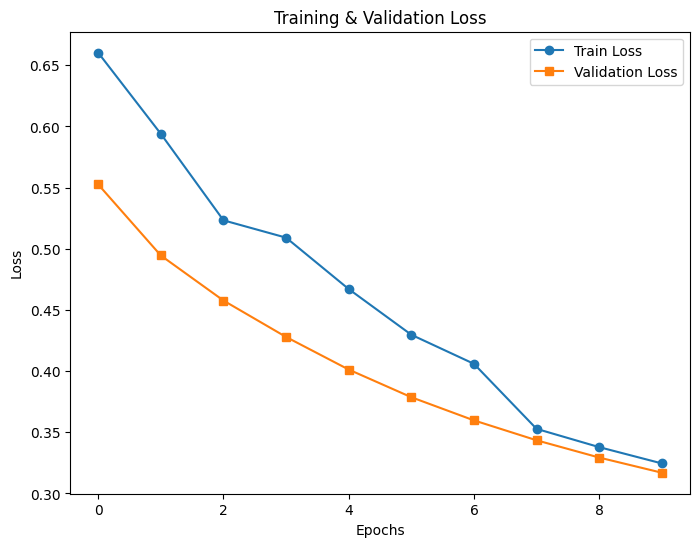

In [9]:
print("\nName: SURYA P")
print("Register Number: 212224230280\n")
def train_model(model, train_loader, test_loader, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss = val_loss / len(test_loader)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f} "
              f"Validation Loss: {val_loss:.4f}")

    print("\nName: SURYA P")
    print("Register Number: 212224230280\n")
    plt.figure(figsize=(8,6))
    plt.plot(train_losses, label="Train Loss", marker='o')
    plt.plot(val_losses, label="Validation Loss", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.show()

train_model(model, train_loader, test_loader, num_epochs=10)


Name: SURYA P
Register Number: 212224230280

Test Accuracy: 0.8595


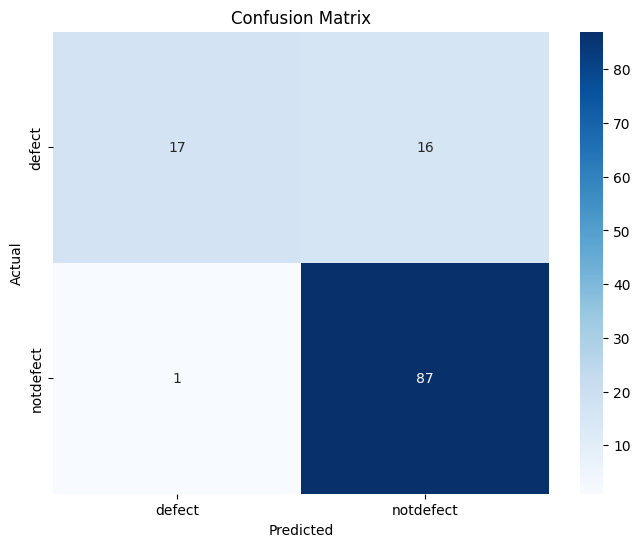


Name: SURYA P
Register Number: 212224230280


Classification Report:

              precision    recall  f1-score   support

      defect       0.94      0.52      0.67        33
   notdefect       0.84      0.99      0.91        88

    accuracy                           0.86       121
   macro avg       0.89      0.75      0.79       121
weighted avg       0.87      0.86      0.84       121



In [12]:
print("\nName: SURYA P")
print("Register Number: 212224230280\n")
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes,
                cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    print("\nName: SURYA P")
    print("Register Number: 212224230280\n")
    print("\nClassification Report:\n")
    print(classification_report(all_labels, all_preds,
                                target_names=train_dataset.classes))

test_model(model, test_loader)



Name: SURYA P
Register Number: 212224230280



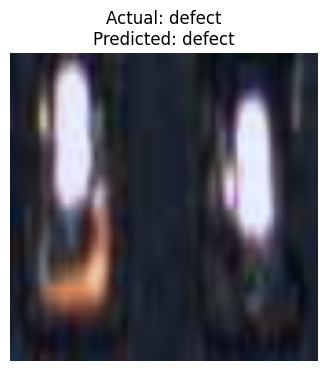

Actual: defect
Predicted: defect

Name: SURYA P
Register Number: 212224230280



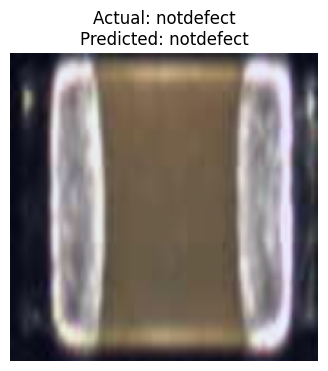

Actual: notdefect
Predicted: notdefect


In [14]:
def predict_image(model, image_index, dataset):
    model.eval()

    image, label = dataset[image_index]

    with torch.no_grad():
        image_tensor = image.unsqueeze(0).to(device)
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    class_names = dataset.classes
    print("\nName: SURYA P")
    print("Register Number: 212224230280\n")
    image_display = image.permute(1,2,0).cpu().numpy()
    image_display = (image_display - image_display.min()) / \
                    (image_display.max() - image_display.min())

    plt.figure(figsize=(4,4))
    plt.imshow(image_display)
    plt.title(f"Actual: {class_names[label]}\n"
              f"Predicted: {class_names[predicted.item()]}")
    plt.axis("off")
    plt.show()

    print(f"Actual: {class_names[label]}")
    print(f"Predicted: {class_names[predicted.item()]}")

predict_image(model, 25, test_dataset)
predict_image(model, 55, test_dataset)
